In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import imageio

In [2]:
#load images
import glob

def load_pics():
    pics = glob.glob('data/**/*.jpg', recursive=True)

    X = []
    names = []
    for pic in pics:
        f = imageio.imread(pic)
        X.append(f)
        names.append(pic[-12:])
    
    X = np.array(X)
    print(X.shape)
    return X, names

#load annotations
def load_annotations(X, order):
    N = X.shape[0]
    f = open('CASIA-Iris-V3-Labels.txt')
    y = np.zeros((N, 3)) 
    for l in f:
        l = l.strip().split(' ')
        name, a, b, c = l[0], int(l[1]), int(l[2]), int(l[3])
        i = order.index(name)
        y[i] += np.array([a, b, c])
    return y
    
X, order = load_pics()
y = load_annotations(X, order)

(2639, 280, 320)


In [3]:
N = X.shape[0]
train = int(6*N/10)
val = int(7*N/10)
X_train = X[:train]
X_val = X[train:val]
X_test = X[val:]
y_train = y[:train]
y_val = y[train:val]
y_test = y[val:]

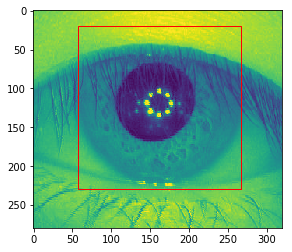

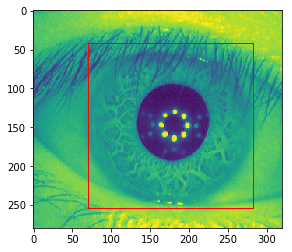

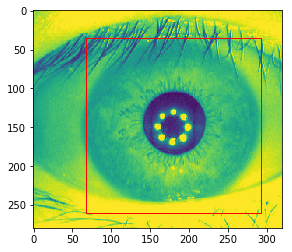

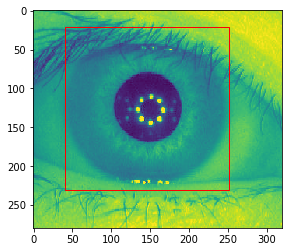

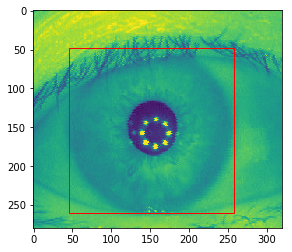

In [4]:
import matplotlib.patches as patches
#print some examples
sub = np.random.choice(X.shape[0], 5)
for x in sub:
    fig, ax = plt.subplots(1)
    plt.imshow(X[x])
    xc, yc, r = y[x]
    rect = patches.Rectangle((xc-r,yc-r),2*r,2*r,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    plt.show()